# Le paquet LEA

Nous allons utiliser le paquet R LEA pour l'analyse d'une population structurée

In [ ]:
# Installation du paquet
source("https://bioconductor.org/biocLite.R")
biocLite("LEA")

In [1]:
# Céation d'un dossier pour les analyses
dir.create("LEA_analyses")
setwd("LEA_analyses")

In [2]:
# On charge les données de test tu paquet
library(LEA)
# Création du fichier "genotypes.lfmm"
# avec 400 SNPs sur 50 individus

data("tutorial")
# On écrit les données en format lfmm et en format geno
write.lfmm(tutorial.R, "genotypes.lfmm")
write.geno(tutorial.R, "genotypes.geno")


[1] "genotypes.lfmm"

[1] "genotypes.geno"

In [3]:
# run of pca
# Available options, K (the number of PCs),
# center and scale.
# Create files: genotypes.eigenvalues - eigenvalues,
# genotypes.eigenvectors - eigenvectors,
# genotypes.sdev - standard deviations,
# genotypes.projections - projections,
# Create a pcaProject object: pc.
pc = pca("genotypes.lfmm", scale = TRUE)

# Perfom Tracy-Widom tests on all eigenvalues.
# create file: tuto.tracyWidom - tracy-widom test information.
tw = tracy.widom(pc)

# display p-values for the Tracy-Widom tests (first 5 pcs).
tw$pvalues[1:5]



[1] "******************************"
[1] " Principal Component Analysis "
[1] "******************************"
summary of the options:

        -n (number of individuals)          50
        -L (number of loci)                 400
        -K (number of principal components) 50
        -x (genotype file)                  /home/willy/housecloud/Work/Enseignement/M2 Bioinfo/BioInfoCours/LEA_analyses/genotypes.lfmm
        -a (eigenvalue file)                /home/willy/housecloud/Work/Enseignement/M2 Bioinfo/BioInfoCours/LEA_analyses/genotypes.pca/genotypes.eigenvalues
        -e (eigenvector file)               /home/willy/housecloud/Work/Enseignement/M2 Bioinfo/BioInfoCours/LEA_analyses/genotypes.pca/genotypes.eigenvectors
        -d (standard deviation file)        /home/willy/housecloud/Work/Enseignement/M2 Bioinfo/BioInfoCours/LEA_analyses/genotypes.pca/genotypes.sdev
        -p (projection file)                /home/willy/housecloud/Work/Enseignement/M2 Bioinfo/BioInfoCours/LEA_anal

[1] 8.000e-09 8.000e-09 8.000e-09 1.503e-04 3.152e-02

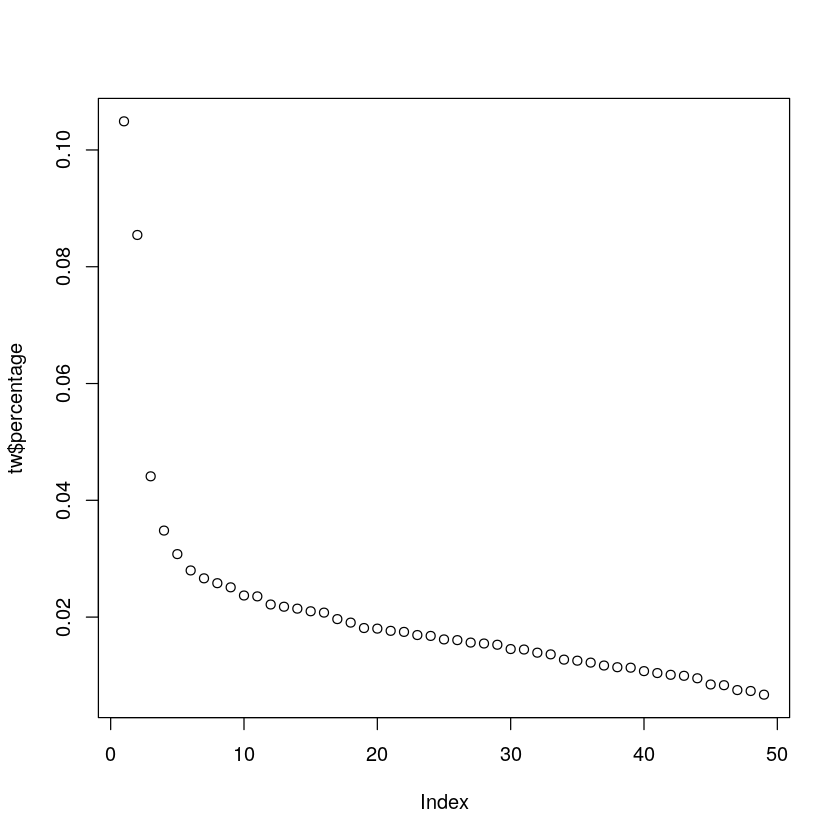

In [4]:
# main options# plot the percentage of variance explained by each component
plot(tw$percentage)

In [5]:
# K = number of ancestral populations
# entropy = TRUE: computes the cross-entropy criterion,
# CPU = 4 the number of CPUs.
project = NULL
project = snmf("genotypes.geno",
               K = 1:10,
               entropy = TRUE,
               repetitions = 10,
               project = "new")


The project is saved into :
 genotypes.snmfProject 

To load the project, use:
 project = load.snmfProject("genotypes.snmfProject")

To remove the project, use:
 remove.snmfProject("genotypes.snmfProject")

[1] 1139423855
[1] "*************************************"
[1] "*          create.dataset            *"
[1] "*************************************"
summary of the options:

        -n (number of individuals)                 50
        -L (number of loci)                        400
        -s (seed random init)                      1139423855
        -r (percentage of masked data)             0.05
        -x (genotype file in .geno format)         /home/willy/housecloud/Work/Enseignement/M2 Bioinfo/BioInfoCours/LEA_analyses/genotypes.geno
        -o (output file in .geno format)           /home/willy/housecloud/Work/Enseignement/M2 Bioinfo/BioInfoCours/LEA_analyses/genotypes.snmf/masked/genotypes_I.geno

 Write genotype file with masked data, /home/willy/housecloud/Work/Enseignement/

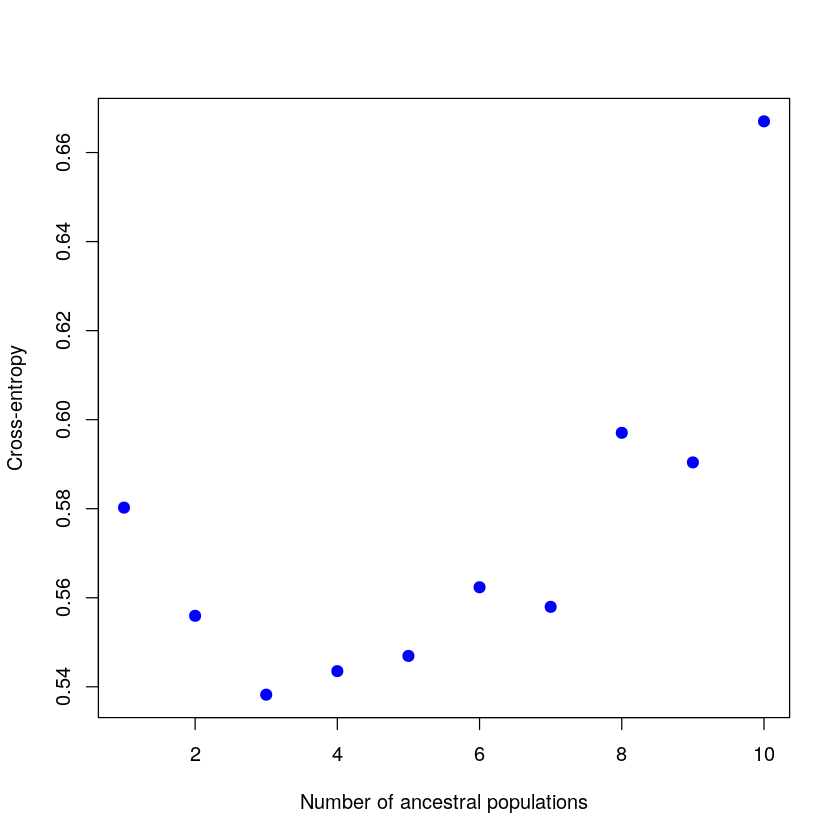

In [6]:
# plot cross-entropy criterion for all runs in the snmf project
plot(project, col = "blue", pch = 19, cex = 1.2)

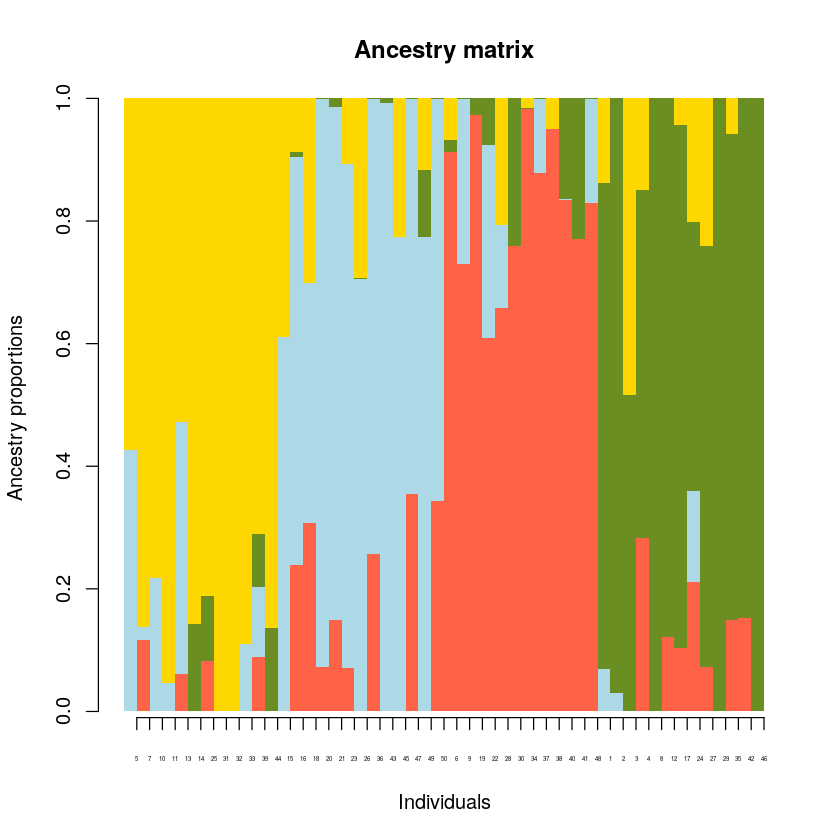

In [7]:
# select the best run for K = 4
best = which.min(cross.entropy(project, K = 4))
my.colors <- c("tomato", "lightblue",
               "olivedrab", "gold")
barchart(project, K = 4, run = best,
         border = NA, space = 0,
         col = my.colors,
         xlab = "Individuals",
         ylab = "Ancestry proportions",
         main = "Ancestry matrix") -> bp
axis(1, at = 1:length(bp$order),
     labels = bp$order, las=1,
     cex.axis = .3)


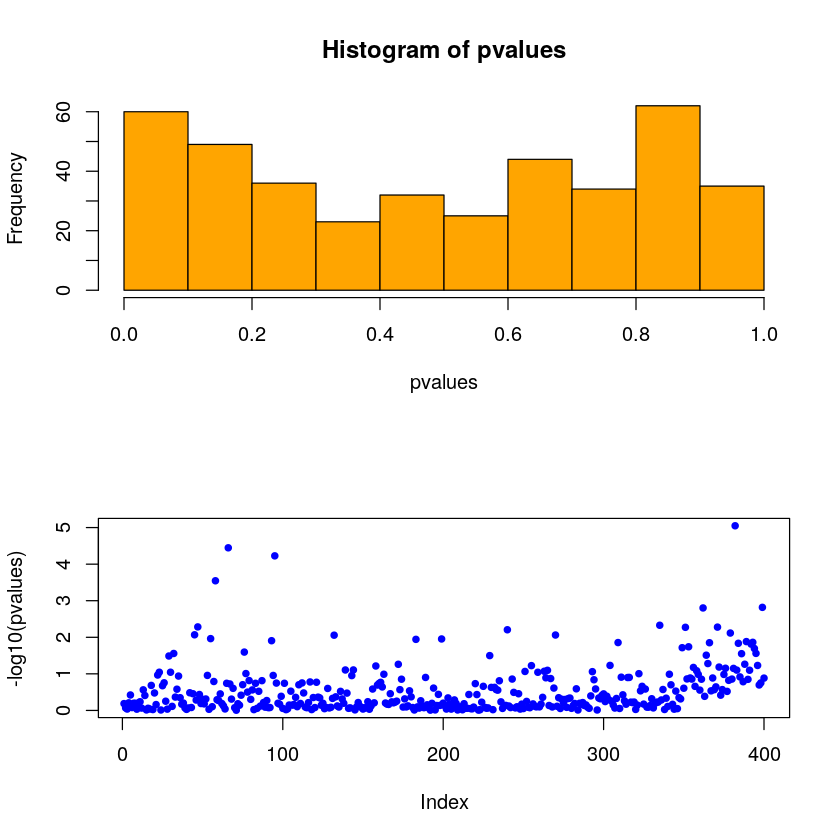

In [8]:
# Population differentiation tests
p = snmf.pvalues(project,
                 entropy = TRUE,
                 ploidy = 2,
                 K = 4)

pvalues = p$pvalues
par(mfrow = c(2,1))
hist(pvalues, col = "orange")
plot(-log10(pvalues), pch = 19, col = "blue", cex = .7)
